In [1]:
import os
import sys
import struct
import pprint
import matplotlib
import matplotlib.pyplot as plt
import pickle
import math
import time
import statistics
import numpy as np
from TraceInc import AutoDict
%pylab inline

type_enum = {
   0 : "Load",
   1 : "Store"
}
pp = pprint.PrettyPrinter(indent=2)

Populating the interactive namespace from numpy and matplotlib


In [2]:
files = ['hs2d', 'hs3d','hist', 'nbody', 'path', 'bfs']

In [3]:
vols = {}
for app in files:
    data = pickle.load( open('../data/'+app+'.vols', "rb"))
    vols[app] = {}
    if app == 'bfs':
        pp.pprint(data["CCV"])
    vols[app]["Load"] = []
    vols[app]["Store"] = []
    tmpl = {}
    tmps = {}
    for k in data['KCV']:
        for it in sorted(list(data['KCV'][k].keys())):
            tmpl[it] = []
            tmps[it] = []
            #if data['KCV'][k][it]['Store']:
            tmps[it].append(data['KCV'][k][it]['Store'] or 1)
            #if data['KCV'][k][it]['Load']:
            tmpl[it].append(data['KCV'][k][it]['Load'] or 1)
    for it in sorted(list(tmpl.keys())):
        vols[app]["Load"].extend(tmpl[it])
        vols[app]["Store"].extend(tmps[it])
#vols['cg']["Load"][:] = vols['cg']["Load"][0:32]
#vols['cg']["Store"][:] = vols['cg']["Store"][0:32] 
#pp.pprint(vols)


{ 'Kernel': { 0: {0: {'Store': 11}},
              2: { 0: {'Load': 1, 'Store': 31},
                   2667174690816: {'Load': 5, 'Store': 27},
                   7340099108864: {'Load': 5, 'Store': 42}},
              4: { 0: {'Load': 2, 'Store': 21},
                   571230650368: {'Load': 6, 'Store': 17},
                   657129996288: {'Load': 6, 'Store': 27},
                   734439407616: {'Load': 6, 'Store': 17},
                   1760936591360: {'Load': 6, 'Store': 12},
                   1786706395136: {'Load': 6, 'Store': 22},
                   1919850381312: {'Load': 6, 'Store': 37},
                   2667174690816: {'Load': 3, 'Store': 27},
                   3234110373888: {'Load': 6, 'Store': 17},
                   3642132267008: {'Load': 6, 'Store': 27},
                   3964254814208: {'Load': 6, 'Store': 17},
                   4011499454464: {'Load': 6, 'Store': 17},
                   4191888080896: {'Load': 6, 'Store': 17},
                   4733053960

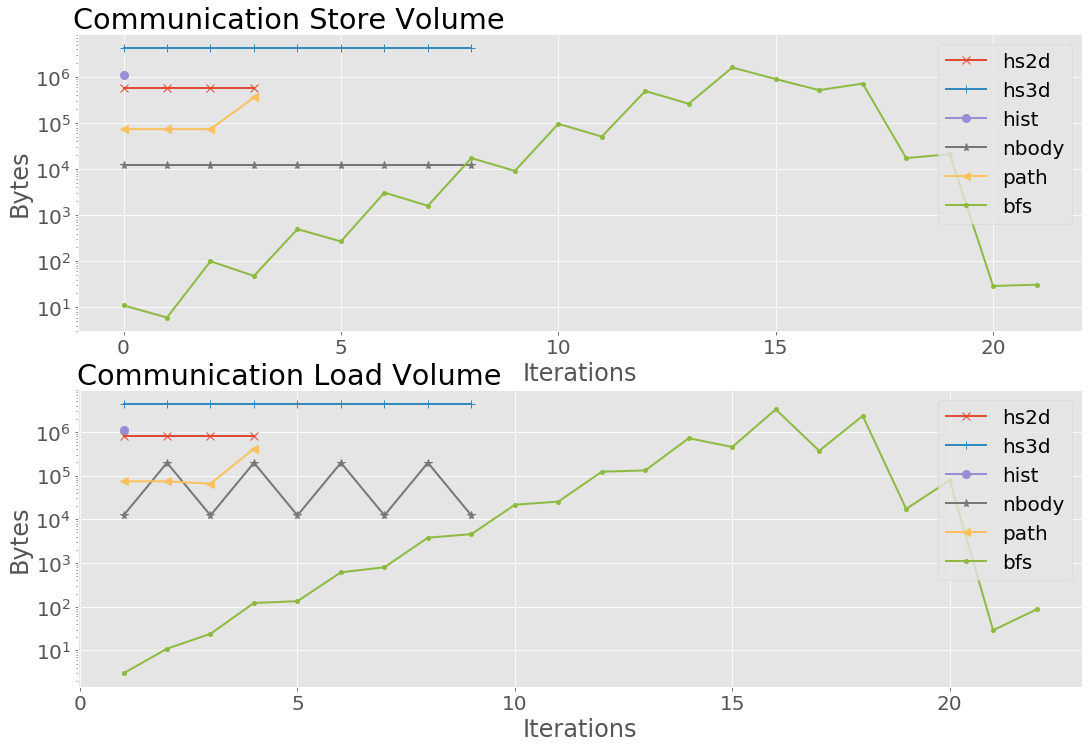

In [9]:
plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (18, 12)
matplotlib.rcParams.update({'font.size': 20})

ind = np.arange(len(files))  # the x locations for the groups
width = 0.35  
symbols = ["x", '+', 'o', '*', '<', '.', 'D']
plt.subplot(211)
for (inx,app) in enumerate(files):
    plt.plot(range(0, len(vols[app]['Store'][:-1])), vols[app]['Store'][:-1], marker=symbols[inx],label=app, alpha=1, markersize=8, linewidth=2)
plt.ylabel('Bytes')
plt.xlabel('Iterations')
plt.title('Communication Store Volume', x=0.21)
plt.legend(loc=1)
plt.yscale('log')


plt.subplot(212)
for (inx,app) in enumerate(files):
    plt.plot(range(1, len(vols[app]['Load'])), vols[app]['Load'][1:], marker=symbols[inx],label=app, alpha=1, markersize=8, linewidth=2)
plt.ylabel('Bytes')
plt.xlabel('Iterations')
plt.title('Communication Load Volume', x=0.21)
plt.legend(loc=1)
plt.yscale('log')


filename = '../plots/transmission-ratio.pdf'
plt.savefig(filename, papertype='a4', bbox_inches='tight', orientation='landscape')
plt.show()